# Two sellers

In [1]:
#sample normal maxprice
import numpy as np
import matplotlib.pyplot as plt

def show_histogram(mean, stdev):
  num_samples = 1000
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)
  plt.hist(samples, bins=20, density=True)
  plt.show()

def sample_one_point(mean, stdev):
  num_samples = 1
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)
  return samples[0]

In [2]:
def two_seller_negotiation(edubuyer, sellers):
  # assume 2 sellers
  terminate = False
  while not terminate:
    offers = [seller.make_offer() for seller in sellers]
    decisions = edubuyer.check_all_offers(offers)
    terminate = ("walk away" in decisions or "accept offer" in decisions)
    # this kind of a junky way to code it
    # but it works for now
    for i, seller in enumerate(sellers):
      new_state = {"last-offer":offers[i],
                  "comp-last-offer":(offers[:i] + offers[i+1:])[0],
                  "offers-made":seller.state["offers-made"]+1}
      seller.update_table(offers[i], decisions[i], new_state)
      seller.state = new_state
  # get reward for the agents if terminated
  profits = [None for i in range(len(sellers))]
  for i, seller in enumerate(sellers):
    if decisions[i] == "accept offer":
      profits[i]=seller.state["last-offer"]-seller.value
    elif decisions[i] == "walk away":
      profits[i]=0
    elif decisions[i] == "competitor won":
      profits[i]=0
  return profits

In [3]:
from buyers import EducatedBuyer
from sellers import RandomSeller, Seller, DescentArithmeticSeller

In [114]:
import random
class QLearningSeller(Seller):
  def __init__(self, value, init_offer):
    super().__init__(value, init_offer)
    action_space_size = self.init_offer - self.value
    state_space_size = (self.init_offer - self.value) ** 2
    self.q_table = np.zeros((state_space_size, action_space_size))

    # Q-Learning parameters
    # alpha
    self.learning_rate = 0.1
    # gamma
    self.discount_rate = 0.99
    # exploration rate for when the model is still learning
    self.exploration_rate = .15

    # # unused variables for a changing exploration rate
    # self.max_exploration_rate = 1
    # self.min_exploration_rate = 0.01
    # self.exploration_decay_rate = 0.001

  def make_offer(self):
    random_number = random.uniform(0, 1)
    if random_number > self.exploration_rate:
      print(self.q_table[self.get_state_array_number(self.state), :])
      offer = np.argmax(self.q_table[self.get_state_array_number(self.state), :]) + (self.value+1)
    else: #exploring
      offer = random.randint(self.value+1,self.state['last-offer']-1)
    return offer

  def update_table(self, offer, decision, new_state):
    if decision == 'accept offer':
      reward = offer - self.value
    else:
      reward = 0
    state_array_number = self.get_state_array_number(self.state)
    new_state_array_number = self.get_state_array_number(new_state)
    self.q_table[state_array_number, offer-(self.value+1)] = self.q_table[state_array_number, offer-(self.value+1)] * (1 - self.learning_rate) + \
                                  self.learning_rate * (reward + self.discount_rate * np.max(self.q_table[new_state_array_number, :]))

  # helper methods
  def get_state_array_number(self, state):
    return state['last-offer']-(self.value+1)+(self.init_offer-self.value)*state['offers-made']

  def from_array_num_get_state(self, array_num):
    offers_made = math.floor(array_num/(self.init_offer-self.value))
    last_offer =  array_num % (self.init_offer-self.value) + (self.value + 1)
    return {"last-offer":last_offer, "offers-made":offers_made}

  def set_exploiting(self):
    self.exploration_rate = 0

In [115]:
#sample normal maxprice
import numpy as np
import matplotlib.pyplot as plt

def show_histogram(mean, stdev):
  num_samples = 1000
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)

  # Round all values below 12 up to 11
  samples[samples < 12] = 11

  plt.hist(samples, bins=20, density=True)
  plt.show()


def sample_one_point(mean, stdev):
  num_samples = 1
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)
  sample = samples[0]
  if sample<12:
    return 12
  else:
    return sample

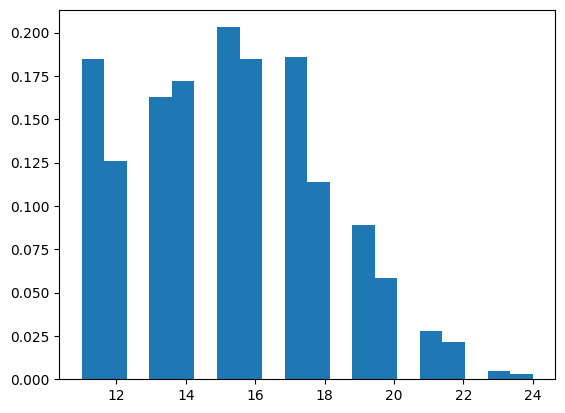

In [116]:
show_histogram(15,3)

In [119]:
range_min = 11
range_max = 15
#show_histogram(mean, stdev)
value = 10
rounds = 10000
imp_incr = 0.1

init_offer = range_max
n = int((init_offer-value)/2)
random_seller = RandomSeller(value=value, init_offer=init_offer)
qseller = QLearningSeller(value=value, init_offer=init_offer)
sellers = [random_seller, qseller]

for i in range(100):
  maxprice = random.randint(range_min, range_max)
  edubuyer = EducatedBuyer(maxprice, imp_incr)
  profits = two_seller_negotiation(edubuyer, sellers)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


IndexError: index 25 is out of bounds for axis 0 with size 25

In [ ]:
def two_seller_negotiation(edubuyer, sellers):
  # assume 2 sellers
  terminate = False
  while not terminate:
    offers = [seller.make_offer() for seller in sellers]
    decisions = edubuyer.check_all_offers(offers)
    terminate = ("walk away" in decisions or "accept offer" in decisions)
    # this kind of a junky way to code it
    # but it works for now
    for i, seller in enumerate(sellers):
      new_state = {"last-offer":offers[i],
                  "comp-last-offer":(offers[:i] + offers[i+1:])[0],
                  "offers-made":seller.state["offers-made"]+1}
      seller.update_table(offers[i], decisions[i], new_state)
      seller.state = new_state
  # get reward for the agents if terminated
  profits = [None for i in range(len(sellers))]
  for i, seller in enumerate(sellers):
    if decisions[i] == "accept offer":
      profits[i]=seller.state["last-offer"]-seller.value
    elif decisions[i] == "walk away":
      profits[i]=0
    elif decisions[i] == "competitor won":
      profits[i]=0
  return profits


import random
class QLearningSeller(Seller):
  def __init__(self, value, init_offer):
    super().__init__(value, init_offer)
    action_space_size = self.init_offer - self.value
    state_space_size = (self.init_offer - self.value) ** 2
    self.q_table = np.zeros((state_space_size, action_space_size))

    # Q-Learning parameters
    # alpha
    self.learning_rate = 0.1
    # gamma
    self.discount_rate = 0.99
    # exploration rate for when the model is still learning
    self.exploration_rate = .15

    # # unused variables for a changing exploration rate
    # self.max_exploration_rate = 1
    # self.min_exploration_rate = 0.01
    # self.exploration_decay_rate = 0.001

  def make_offer(self):
    random_number = random.uniform(0, 1)
    if random_number > self.exploration_rate:
      print(self.q_table[self.get_state_array_number(self.state), :])
      offer = np.argmax(self.q_table[self.get_state_array_number(self.state), :]) + (self.value+1)
    else: #exploring
      offer = random.randint(self.value+1,self.state['last-offer'])
    return offer

  def update_table(self, offer, decision, new_state):
    if decision == 'accept offer':
      reward = offer - self.value
    else:
      reward = 0
    state_array_number = self.get_state_array_number(self.state)
    new_state_array_number = self.get_state_array_number(new_state)
    self.q_table[state_array_number, offer-(self.value+1)] = self.q_table[state_array_number, offer-(self.value+1)] * (1 - self.learning_rate) + \
                                  self.learning_rate * (reward + self.discount_rate * np.max(self.q_table[new_state_array_number, :]))

  # helper methods
  def get_state_array_number(self, state):
    return state['last-offer']-(self.value+1)+(self.init_offer-self.value)*state['offers-made']

  def from_array_num_get_state(self, array_num):
    offers_made = math.floor(array_num/(self.init_offer-self.value))
    last_offer =  array_num % (self.init_offer-self.value) + (self.value + 1)
    return {"last-offer":last_offer, "offers-made":offers_made}

  def set_exploiting(self):
    self.exploration_rate = 0


def sample_one_point(mean, stdev):
  num_samples = 1
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)
  sample = samples[0]
  if sample<12:
    return 11
  else:
    return sample

In [ ]:
total_profits = [0 for i in range(len(sellers))]

for i in range(rounds):
  maxprice = sample_one_point(mean,stdev)
  edubuyer = EducatedBuyer(maxprice, imp_incr)
  profits = two_seller_negotiation(edubuyer, sellers)
  for i in range(len(total_profits)):
    total_profits[i] += profits[i]
print(total_profits)